# **Big Data and Analytics-5542 Semester Project**
# **Plant Leaf Species Classification**


### **Data Preprocessing - Uploading files, Extracting data from compressed folders, Displaying the Data.**

**Uploading the images.rar to colab's environment**

In [ ]:
# #using colab's files module to use file upload method
from google.colab import files
files.upload()

Saving images.zip to images.zip


In [7]:
#Printing the file path with directory name and file .
import os
for dirname, _, filenames in os.walk('/content'):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/images.zip
/content/.config/gce
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/.last_survey_prompt.yaml
/content/.config/logs/2021.11.18/14.35.58.667492.log
/content/.config/logs/2021.11.18/14.35.57.849518.log
/content/.config/logs/2021.11.18/14.34.49.152157.log
/content/.config/logs/2021.11.18/14.35.09.738473.log
/content/.config/logs/2021.11.18/14.35.29.959577.log
/content/.config/logs/2021.11.18/14.35.36.918574.log
/content/.config/configurations/config_default
/content/images/951.jpg
/content/images/113.jpg
/content/images/1009.jpg
/content/images/782.jpg
/content/images/721.jpg
/content/images/1161.jpg
/content/images/314.jpg
/content/images/396.jpg
/content/images/606.jpg
/content/images/131.jpg
/content/images/160.jpg
/content/images/159.jpg
/content/images/1198.jpg
/content/images/994.jpg
/content/images/747.jpg
/content/images/1471.jpg
/content/images/6

In [ ]:
#extracting the zip file cintaining the images
import zipfile
with zipfile.ZipFile('/content/images.zip') as z_img:
    z_img.extractall()

In [ ]:
#Importing basic required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns

In [ ]:
#total no. of images in the dataset
len(os.listdir('/content/drive/MyDrive/Big_Data_Project/images/images'))

1584

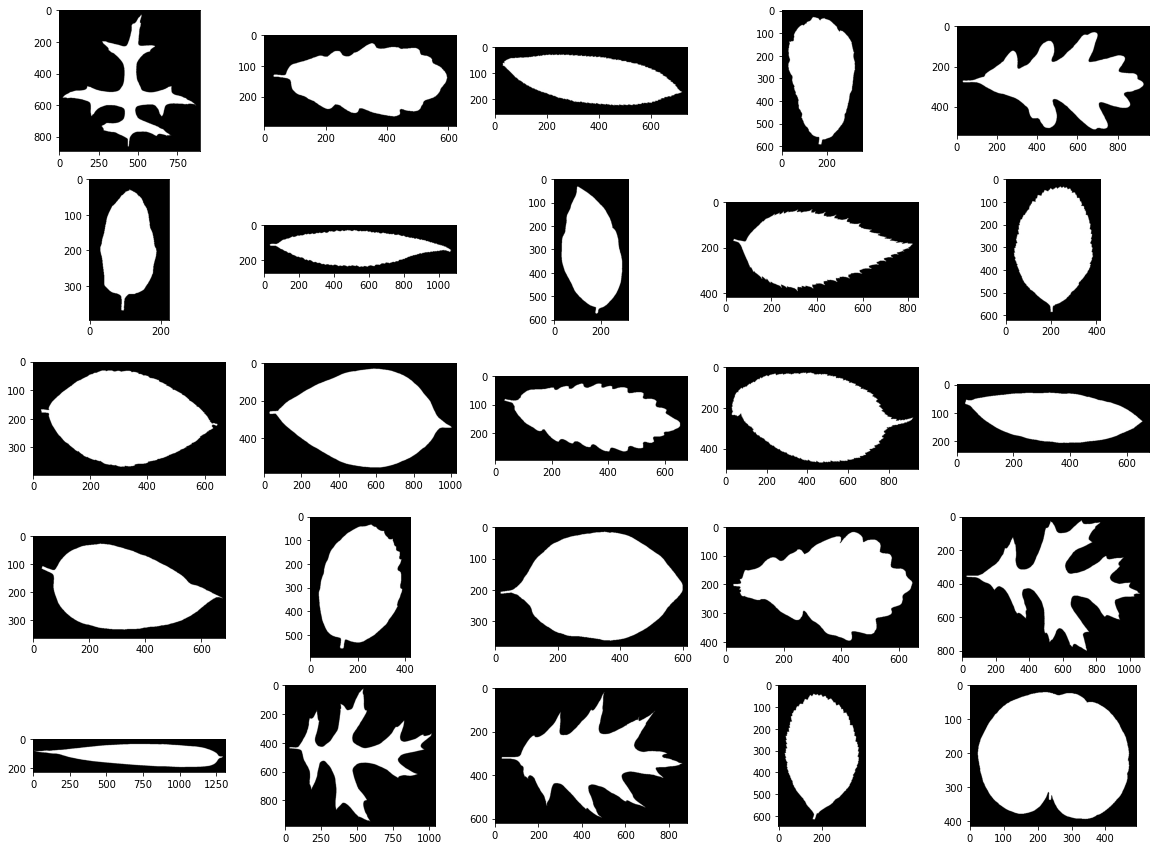

In [8]:
#Plotting the sample images
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('/content/images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

**Importing Train and Test sets**

In [47]:
uploaded = files.upload()
df = pd.read_csv('train.csv')

Saving train.csv to train (1).csv


In [48]:
uploaded = files.upload()
dftest = pd.read_csv('test.csv')

Saving test.csv to test (1).csv


In [50]:
df.sample(5)

id                      species  ...  texture63  texture64
273   452              Quercus_Brantii  ...   0.033203   0.079102
927  1492            Quercus_x_Turneri  ...   0.007812   0.025391
962  1544              Tilia_Tomentosa  ...   0.000000   0.012695
975  1561  Rhododendron_x_Russellianum  ...   0.012695   0.000977
25     38              Acer_Platanoids  ...   0.000000   0.035156

[5 rows x 194 columns]

In [51]:
dftest.sample(5)

id   margin1   margin2  ...  texture62  texture63  texture64
455  1204  0.000000  0.009766  ...   0.000000   0.051758   0.022461
534  1422  0.005859  0.019531  ...   0.000000   0.007812   0.041992
379  1035  0.007812  0.005859  ...   0.018555   0.017578   0.067383
92    209  0.044922  0.078125  ...   0.015625   0.005859   0.000000
177   448  0.001953  0.003906  ...   0.031250   0.000000   0.030273

[5 rows x 193 columns]

In [14]:
df.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [15]:
df.shape

(990, 194)

In [16]:
dftest.shape

(594, 193)

In [17]:
df.describe()

id     margin1     margin2  ...   texture62   texture63   texture64
count   990.000000  990.000000  990.000000  ...  990.000000  990.000000  990.000000
mean    799.595960    0.017412    0.028539  ...    0.020291    0.008989    0.019420
std     452.477568    0.019739    0.038855  ...    0.039040    0.013791    0.022768
min       1.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     415.250000    0.001953    0.001953  ...    0.000000    0.000000    0.000977
50%     802.500000    0.009766    0.011719  ...    0.003906    0.002930    0.011719
75%    1195.500000    0.025391    0.041016  ...    0.023438    0.012695    0.029297
max    1584.000000    0.087891    0.205080  ...    0.375980    0.086914    0.141600

[8 rows x 193 columns]

**Count Plot displaying the count of each species class in the Train dataset**

In [18]:
#Checking the class counts and visualizing the same using count plot
df.species.value_counts()

Quercus_Pubescens          10
Acer_Opalus                10
Liriodendron_Tulipifera    10
Prunus_X_Shmittii          10
Quercus_Palustris          10
                           ..
Crataegus_Monogyna         10
Quercus_Ilex               10
Quercus_Dolicholepis       10
Quercus_Castaneifolia      10
Quercus_Variabilis         10
Name: species, Length: 99, dtype: int64

Text(0.5, 1.0, 'Species Class Distribution Plot')

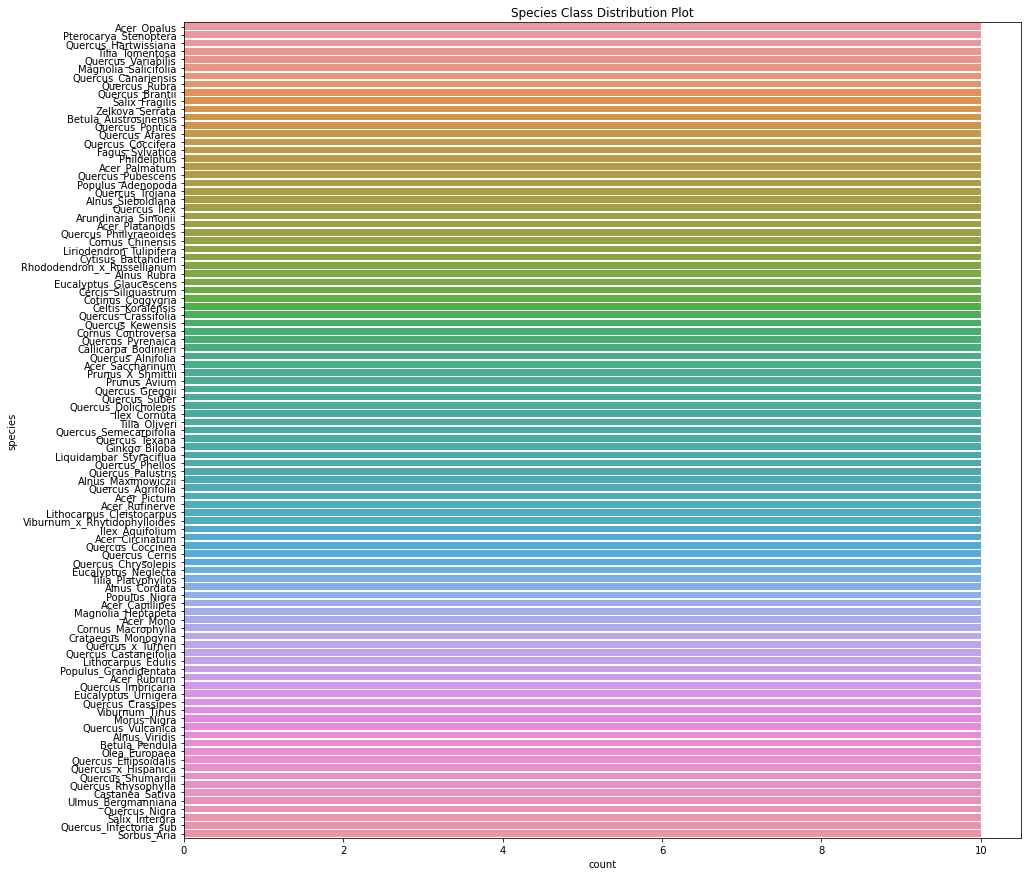

In [19]:
#count Plot
plt.figure(figsize=(15,15))
sns.countplot(y = df.species).set_title('Species Class Distribution Plot')

**Label Encoding the Species for building the classification models**

In [20]:
#Importing Label encoder for encoding the species
from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedShuffleSplit
encoder=LabelEncoder()
le=encoder.fit(df.species)
labels=le.transform(df.species)
classes=list(le.classes_)
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [21]:
df=df.drop(['id','species'],axis=1)
test_id=dftest.id
dftest=dftest.drop(['id'],axis=1)
print(df.shape)
print(dftest.shape)

(990, 192)
(594, 192)


In [22]:
#Total no of lables
print(f'Labels:',len(labels))

Labels: 990


In [23]:
#Unique labels
uniquelables=np.unique(labels)
len(uniquelables)

99

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.000000    203
0.001953    105
0.003906     61
0.005859     51
0.007812     47
0.009766     41
0.011719     39
0.015625     33
0.017578     33
0.013672     33
0.019531     26
0.021484     26
0.025391     26
0.023438     23
0.027344     18
0.029297     17
0.060547     15
0.033203     15
0.050781     15
0.037109     14
0.052734     13
0.035156     12
0.039062     11
0.031250     11
0.046875     10
0.041016     10
0.056641     10
0.042969      9
0.064453      7
0.058594      6
0.062500      6
0.048828      6
0.068359      6
0.044922      5
0.054688      5
0.072266      4
0.082031      3
0.080078      3
0.070312      2
0.076172      2
0.066406      2
0.078125      2
0.085938      1
0.083984      1
0.074219      1
0.087891      1
Name: margin1, dtype: int64


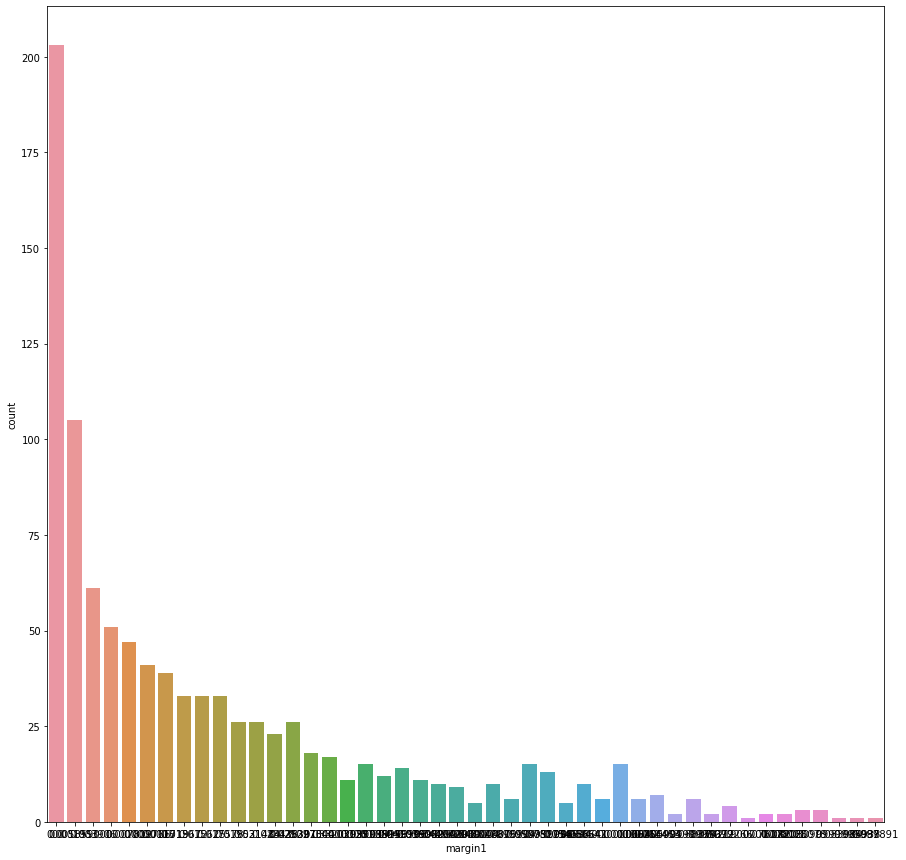

In [24]:
#count plot of margin1
plt.figure(figsize=(15,15))
ax=sns.countplot(df["margin1"])
target_column2 = df.margin1.value_counts()
print(target_column2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.000000    255
0.000977     48
0.001953     44
0.003906     38
0.002930     36
           ... 
0.128910      1
0.120120      1
0.163090      1
0.049805      1
0.239260      1
Name: texture1, Length: 133, dtype: int64


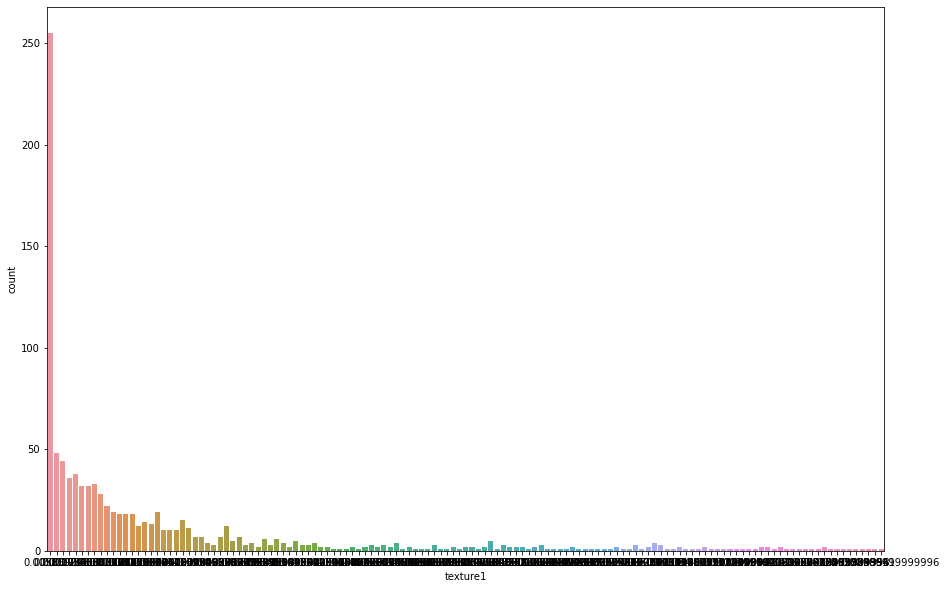

In [25]:
#count plot of texture1
plt.figure(figsize=(15,10))
ax=sns.countplot(df["texture1"])
target_column3 = df.texture1.value_counts()
print(target_column3)

**Correlation Heatmap**

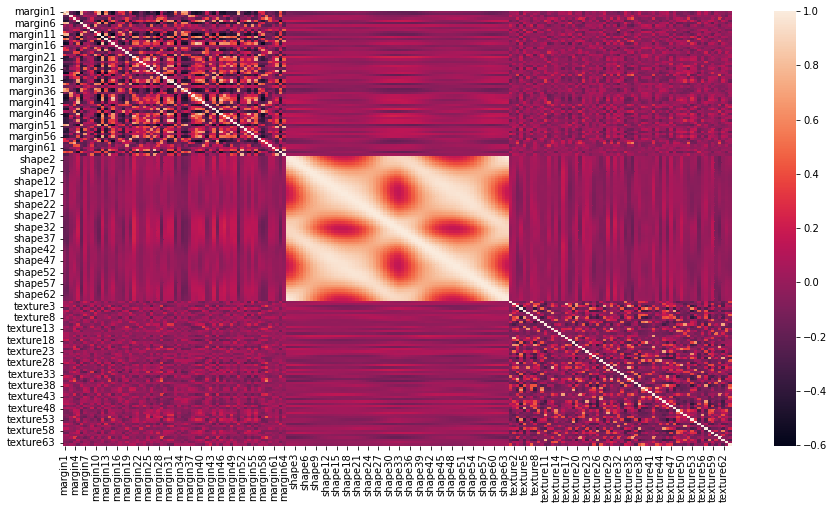

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr())

### **Model Building**

**Splitting the data into Train and Test**

In [27]:
from sklearn.model_selection import train_test_split
#Using stratified sampling to be sure that the classes in the split are proportionately distributed
X_train, X_test, y_train, y_test=train_test_split(df,labels,test_size=0.20,shuffle=True,stratify=labels)

**Importing required libraries for model building and evaluation**

In [28]:
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

**KNN Model**

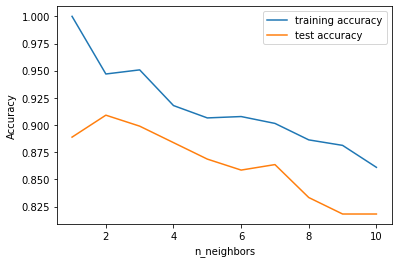

In [29]:
#KNN
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [30]:
#Selecting the no of neighbors as '7' and builidng the KNN Model based on the plot
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


**Random Forest and Decision Tree models**

In [31]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.990


In [32]:
rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
rf1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.939


In [40]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
clf = tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.717


In [41]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [34]:
path = tree.cost_complexity_pruning_path(X_train,y_train)
alphas = path['ccp_alphas']
alphas

array([0.        , 0.00126263, 0.00126263, 0.00126263, 0.00126263,
       0.00126263, 0.00126263, 0.00126263, 0.00189394, 0.00189394,
       0.0020202 , 0.00210438, 0.00224467, 0.00224467, 0.00224467,
       0.00224467, 0.00224467, 0.00224467, 0.00224467, 0.00224467,
       0.00224467, 0.00224467, 0.00224467, 0.00224467, 0.00224467,
       0.00224467, 0.00224467, 0.00224467, 0.00224467, 0.00224467,
       0.00224467, 0.00224467, 0.00224467, 0.00231481, 0.00239899,
       0.00294613, 0.0030303 , 0.0030303 , 0.0030303 , 0.0030303 ,
       0.00315657, 0.00337995, 0.00392817, 0.0040404 , 0.0040404 ,
       0.00455948, 0.00455948, 0.00509907, 0.00577355, 0.00581209,
       0.0060758 , 0.00642792, 0.00652681, 0.0068743 , 0.00690937,
       0.00711324, 0.00717801, 0.0074129 , 0.00769373, 0.00794791,
       0.00810185, 0.00816336, 0.0082883 , 0.008367  , 0.00865801,
       0.00872384, 0.00874204, 0.00877487, 0.00881675, 0.0088188 ,
       0.00887283, 0.00892091, 0.00892878, 0.00897258, 0.00903

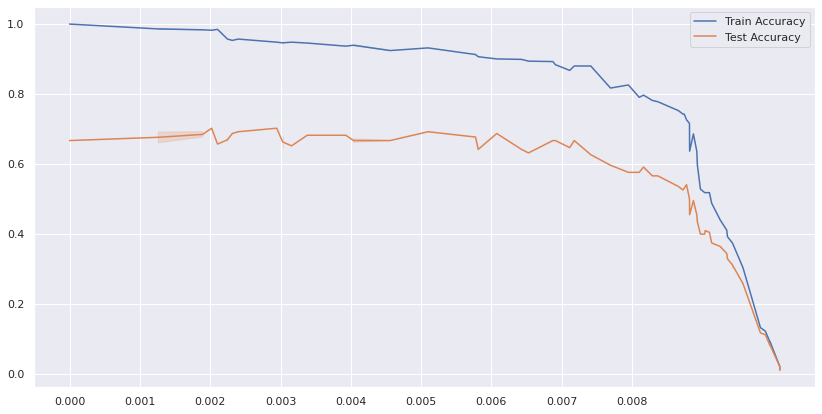

In [35]:
#Train and test accuracies plot at different alpha positions
accuracy_train,accuracy_test = [],[]
for i in alphas:
  tree = DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_train_pred = tree.predict(X_train)
  y_test_pred = tree.predict(X_test)

  accuracy_train.append(accuracy_score(y_train,y_train_pred))
  accuracy_test.append(accuracy_score(y_test,y_test_pred))

sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.000,0.009,0.001))
plt.show()


In [37]:
tree = DecisionTreeClassifier(ccp_alpha=0.002, random_state=0)
clf = tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.702


In [52]:
#XGB Classifier
model_2 = XGBClassifier()
print(model_2.fit(X_train,y_train))
print(f'score Model:',model_2.score(X_test,y_test))
y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

XGBClassifier(objective='multi:softprob')
score Model: 0.8636363636363636
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [53]:
#SVM
from sklearn.pipeline import make_pipeline
model_3= make_pipeline(StandardScaler(),SVC(gamma=0.001, C=100.))
print(model_3.fit(X_train,y_train))
print(f'score Model:',model_3.score(X_test,y_test))
y_pred = model_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=100.0, gamma=0.001))])
score Model: 0.9797979797979798
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [54]:
#Stacking model
level0 = list()
level0.append(('sgd', XGBClassifier()))
level0.append(('svm', SVC(kernel='linear', gamma=0.01, probability= True)))
level0.append(('knn', KNeighborsClassifier(n_neighbors = 6)))
level0.append(('RF',  RandomForestClassifier()))
# define meta learner model
level1 = SVC()
# define the stacking ensemble
stack = make_pipeline(StandardScaler(),StackingClassifier(estimators=level0, final_estimator=level1, cv=5))
stack.fit(X_train,y_train)
pred = stack.predict(X_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

0.9595959595959596
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         2
        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
#Function to build models and check for accuracy score
def checkAccuracyScore(model,X_train, X_test, Y_train, Y_test):
  model.fit(X_train, Y_train)
  Ytrain_predict = model.predict(X_train)
  print("Classification Report:\n", classification_report(Y_train, Ytrain_predict),"\n")
  print("Accuracy on Train Data", accuracy_score(Y_train, Ytrain_predict))
  print("\n_________________________________________________________________________\n")
  Ytest_predict = model.predict(X_test)
  print("Classification Report:\n", classification_report(Y_test, Ytest_predict)) 
  print("Accuracy on Test Data", accuracy_score(Y_test, Ytest_predict))


**Initializing the models to be built and creating a dictionary of the same for looping further below**

In [56]:
#Initializing all the models that are going to be built
logit = make_pipeline(StandardScaler(),LogisticRegression())
svm = make_pipeline(StandardScaler(),SVC(kernel='linear', gamma=0.01))
knn = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors = 7))
RF = make_pipeline(StandardScaler(),RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1))
DT = make_pipeline(StandardScaler(),DecisionTreeClassifier(ccp_alpha=0.002, random_state=0))
xgboost = make_pipeline(StandardScaler(),XGBClassifier(learning_rate=0.19, max_depth = 8, n_estimators = 100,scale_pos_weight= 3))
stack = make_pipeline(StandardScaler(),make_pipeline(StandardScaler(),StackingClassifier(estimators=level0, final_estimator=level1, cv=5)))
LDA = make_pipeline(StandardScaler(),LinearDiscriminantAnalysis())
QDA = make_pipeline(StandardScaler(),QuadraticDiscriminantAnalysis())

In [57]:
#Creating a dictionary of the models for looping
models = [
 {"title": "Logistic", "type": logit},
 {"title": "SVM", "type": svm},
 {"title": "K-NN", "type": knn},
 {"title": "XGBoosting" , "type": xgboost},
 {"title": "RF", "type": RF},
 {"title": "DT", "type": DT},
 {"title": "Stacking", "type": stack},
 {"title": "Latent Discriminant Analysis", "type": LDA},
 {"title": "Quadratic Discriminant Analysis", "type": QDA}
 ]

**Loop to build the models and display the Train and Test accuracies and Classification Reports**

In [58]:
#Building the Models and Printing the Accuracies and classification reports
for model in models:
 print(model['title'])
 print(".................\n")
 
 checkAccuracyScore(model['type'], X_train, X_test, y_train, y_test)
 print("\n############################## THE NEXT MODEL #############################################")
 print(" ")

Logistic
.................



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         2
          13       0.50      0.50      0.50         2
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00      0.50      0.67         2
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         2
          16       1.00      1.00      1.00         2
   

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         8
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         8
          16       1.00      1.00      1.00         8
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


>>>>>>># **END**

